# Price Trend Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read Dataset

In [2]:
cal_df = pd.read_csv('../data/calendar_2019.csv',sep=',')

In [3]:
cal_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,957224,2019-09-22,f,$275.00,$275.00,3,1125
1,957224,2019-09-23,f,$275.00,$275.00,3,1125
2,957224,2019-09-24,f,$275.00,$275.00,3,1125
3,957224,2019-09-25,f,$275.00,$275.00,3,1125
4,957224,2019-09-26,f,$275.00,$275.00,3,1125


In [4]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084515 entries, 0 to 2084514
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 111.3+ MB


In [5]:
cal_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,957224,2019-09-22,f,$275.00,$275.00,3,1125
1,957224,2019-09-23,f,$275.00,$275.00,3,1125
2,957224,2019-09-24,f,$275.00,$275.00,3,1125
3,957224,2019-09-25,f,$275.00,$275.00,3,1125
4,957224,2019-09-26,f,$275.00,$275.00,3,1125


## Data Preprocessing

In [6]:
cal_df.isnull().sum()

listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

In [7]:
# Remove '$' and ',' in price
cal_df['price'] = cal_df['price'].str.replace('$','')
cal_df['price'] = cal_df['price'].str.replace(',', '')

# Convert the type of price to float
cal_df['price'] = pd.to_numeric(cal_df['price'],errors='coerce')

In [8]:
# Examing changes
cal_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,957224,2019-09-22,f,275.0,$275.00,3,1125
1,957224,2019-09-23,f,275.0,$275.00,3,1125
2,957224,2019-09-24,f,275.0,$275.00,3,1125
3,957224,2019-09-25,f,275.0,$275.00,3,1125
4,957224,2019-09-26,f,275.0,$275.00,3,1125


In [9]:
# Remove duplicated data
cal_df.duplicated().sum()
cal_df.drop_duplicates(inplace=True)
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2084515 entries, 0 to 2084514
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             float64
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: float64(1), int64(3), object(3)
memory usage: 127.2+ MB


## Extract Features

In [10]:
# Extract new features from attribute "date"
split = pd.DataFrame()
split['year'] = pd.to_datetime(cal_df['date']).dt.year
split['month'] = pd.to_datetime(cal_df['date']).dt.month
split['day_of_week'] = pd.to_datetime(cal_df['date']).dt.dayofweek
split['day_of_week'] = split['day_of_week'] + 1
split.head()

,year,month,day_of_week
0,2019,9,7
1,2019,9,1
2,2019,9,2
3,2019,9,3
4,2019,9,4


In [11]:
# Generate a new data frame
new_calendar = cal_df.join(split, on=None, how='left', sort=False)
new_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,year,month,day_of_week
0,957224,2019-09-22,f,275.0,$275.00,3,1125,2019,9,7
1,957224,2019-09-23,f,275.0,$275.00,3,1125,2019,9,1
2,957224,2019-09-24,f,275.0,$275.00,3,1125,2019,9,2
3,957224,2019-09-25,f,275.0,$275.00,3,1125,2019,9,3
4,957224,2019-09-26,f,275.0,$275.00,3,1125,2019,9,4


## Q6: What is the trend of Airbnb price in Boston? What time is an economical choice for tourists visiting Boston?

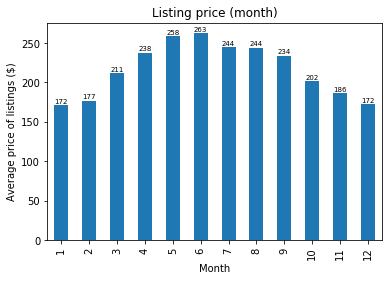

In [12]:
# Month trend - histogram
price_month = new_calendar[['month','price']]
price_month_mean = price_month.groupby('month').mean()
plot1 = price_month_mean.plot(kind='bar', legend=None)
plot1.set_xlabel('Month')
plot1.set_ylabel('Average price of listings ($)')
plot1.set_title('Listing price (month)')

# Add value in plot
for x,y in enumerate(price_month_mean['price']):
    plt.text(x, y+1, '%.0f' % y, ha='center', va='bottom', fontsize=7)
plot1

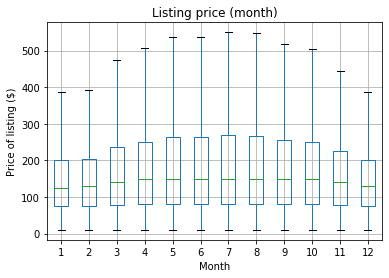

In [13]:
# Month trend - box plot
price_month1 = price_month.pivot(columns='month',values='price')
plot2 = price_month1.boxplot(showfliers=False)
plot2.set_xlabel('Month')
plot2.set_ylabel('Price of listing ($)')
plot2.set_title('Listing price (month)')
plot2

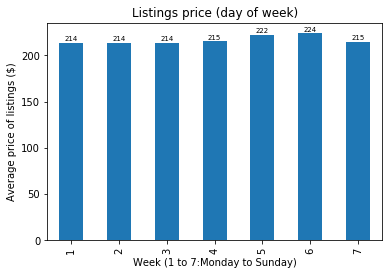

In [14]:
# Week trend - histogram
price_week = new_calendar[['day_of_week','price']]
price_week_mean = price_week.groupby('day_of_week').mean()
plot3 = price_week_mean.plot(kind='bar', legend=None)
plot3.set_xlabel('Week (1 to 7:Monday to Sunday)')
plot3.set_ylabel('Average price of listings ($)')
plot3.set_title('Listings price (day of week)')

# Add value in plot
for x,y in enumerate(price_week_mean['price']):
    plt.text(x, y+1, '%.0f' % y, ha='center', va='bottom', fontsize=7)
plot3

Text(0.5, 1.0, 'Listings price (day of week)')

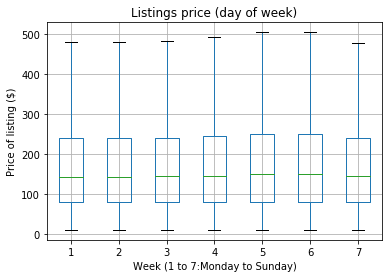

In [15]:
# Week trend - box plot
price_week1 = price_week.pivot(columns='day_of_week',values='price')
plot4 = price_week1.boxplot(showfliers=False)
plot4.set_xlabel('Week (1 to 7:Monday to Sunday)')
plot4.set_ylabel('Price of listing ($)')
plot4.set_title('Listings price (day of week)')